<h1 style="color:orange" align=center>Spaceship Titanic Classification🌔</h1>




In [83]:
#importe de librerias
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [84]:
import pandas as pd
# Crear un DataFrame
df = pd.read_csv("train.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [85]:
df = pd.read_csv("train.csv")
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [86]:
train_df = pd.read_csv("train.csv")
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [87]:
duplicates = df[df.duplicated()]

if duplicates.empty:
    print("No hay filas duplicadas.")
else:
    print("Se encontraron filas duplicadas:")
    print(duplicates)


No hay filas duplicadas.


In [88]:
#valores Nan
df.isna().sum()


PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [89]:
#contar numero de personas transportadas
df.Transported.value_counts()


Transported
True     4378
False    4315
Name: count, dtype: int64

In [90]:
print("cardinality of categorical features in training datasets is:")
print(train_df.select_dtypes(include="object").nunique())
print("\n","-"*70)

cardinality of categorical features in training datasets is:
PassengerId    8693
HomePlanet        3
CryoSleep         2
Cabin          6560
Destination       3
VIP               2
Name           8473
dtype: int64

 ----------------------------------------------------------------------


In [92]:
df.columns


Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

- **vizualizacion y limpieza de la caracteristica Transported**

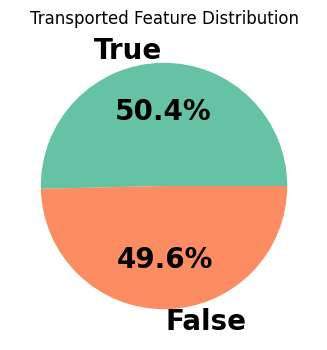

In [112]:
plt.figure(figsize=(8,4))
plt.pie(train_df["Transported"].value_counts(),labels=train_df["Transported"].value_counts().keys(),autopct="%1.1f%%",
       textprops={"fontsize":20,"fontweight":"black"},colors=sns.color_palette("Set2"))
plt.title("Transported Feature Distribution");


In [117]:
df["Transported"] = df["Transported"].astype(int)

In [118]:
df.dtypes


PassengerId      object
HomePlanet       object
CryoSleep          bool
Cabin            object
Destination      object
Age             float64
VIP                bool
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported       int64
dtype: object

In [124]:
df.drop(["Name","Cabin","PassengerId"],axis="columns",inplace=True)


KeyError: "['Name', 'Cabin', 'PassengerId'] not found in axis"

- **vizualizacion y limpieza de la caracteristica AGE**


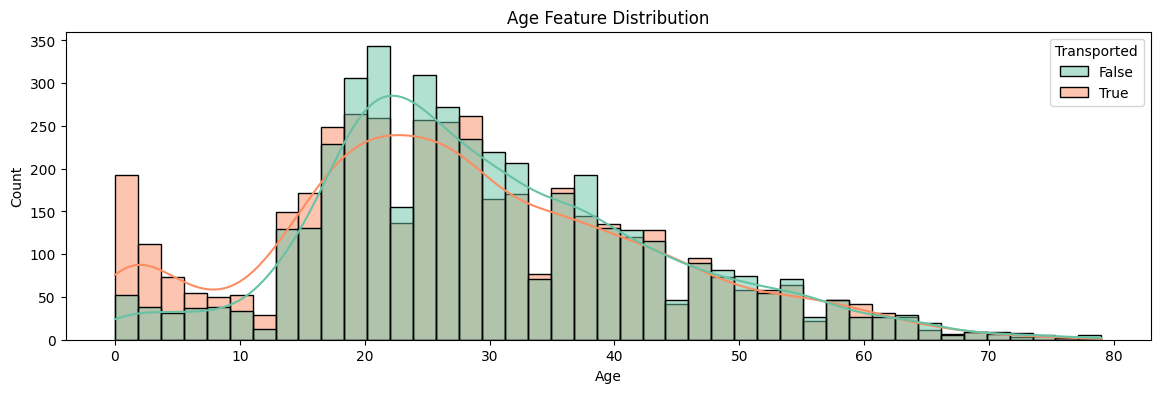

In [101]:

plt.figure(figsize=(14,4))
sns.histplot(x=train_df["Age"],hue="Transported",data=train_df,kde=True,palette="Set2")
plt.title("Age Feature Distribution");


In [94]:
df["Age"].median()

27.0

In [96]:
#sabiendo que los valores Nan de AGe son 179, los rellenamos 
df["Age"] = df["Age"].fillna(df["Age"].median())

# veriifcamos 
df["Age"].isna().sum()


0

- **vizualizacion y limpieza de la caracteristica ("HomePlanet", "CryoSleep", "Destination", "VIP")**




In [103]:
string_counts_home = df["HomePlanet"].value_counts()
max_string_home = string_counts_home.idxmax()

string_counts_cryo = df["CryoSleep"].value_counts()
max_string_cryo = string_counts_cryo.idxmax()

string_counts_dest = df["Destination"].value_counts()
max_string_dest = string_counts_dest.idxmax()

string_counts_vip = df["VIP"].value_counts()
max_string_vip = string_counts_vip.idxmax()



In [108]:
#Rellenamos los valores NAn de las caracteristicas 
df["HomePlanet"].fillna(max_string_vip, inplace=True)
df["CryoSleep"].fillna(max_string_vip, inplace=True)
df["Destination"].fillna(max_string_vip, inplace=True)
df["VIP"].fillna(max_string_vip, inplace=True)


In [109]:
#comprobando 
#valores Nan
df.isna().sum()


PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin           199
Destination       0
Age               0
VIP               0
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

- **vizualizacion y limpieza de la caracteristica ("RoomServic", "FoodCourt", "ShoppingMall", "Spa", "VRDeck")**


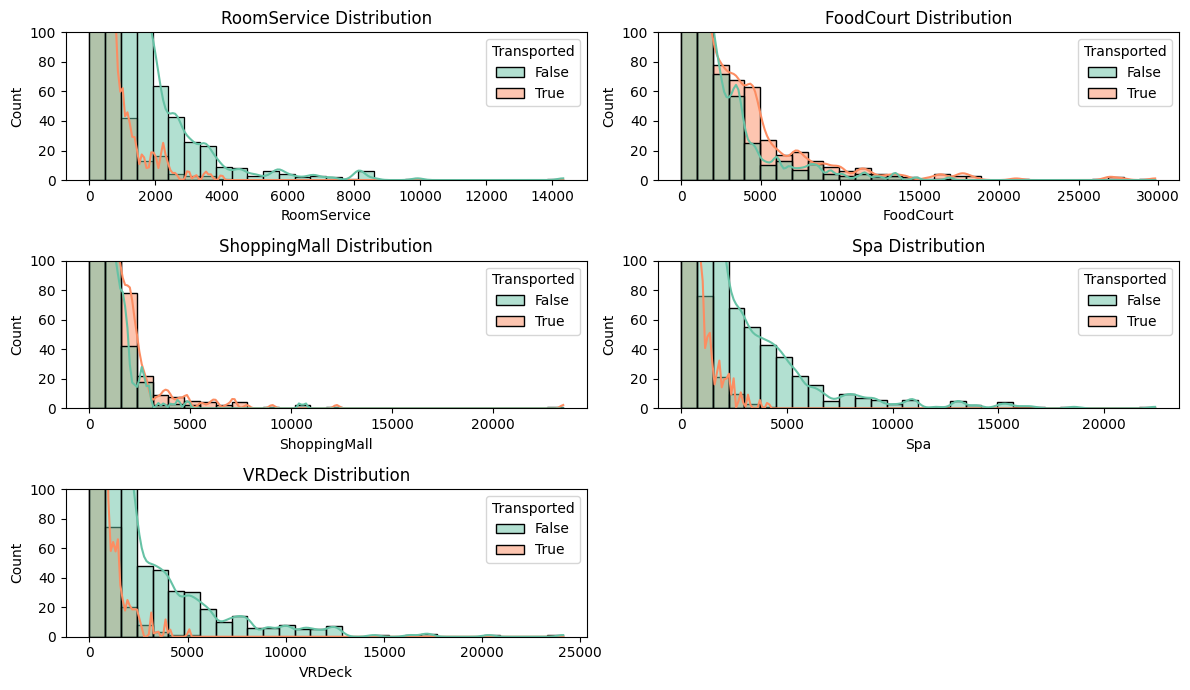

In [120]:
exp_cols = ["RoomService","FoodCourt","ShoppingMall","Spa","VRDeck"]

plt.figure(figsize=(12,7))
for idx,column in enumerate(exp_cols):
    plt.subplot(3,2,idx+1)
    sns.histplot(x=column, hue="Transported", data=train_df,bins=30,kde=True,palette="Set2")
    plt.title(f"{column} Distribution")
    plt.ylim(0,100)
    plt.tight_layout()

In [125]:
df.dropna(inplace=True)

In [122]:
df.drop(["Name","Cabin","PassengerId"],axis="columns",inplace=True)


In [128]:
#verificar que se hayan eliminado los valores NaN
df.isna().sum()



HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64

In [133]:
df.shape


(7785, 11)